# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Title | How to Choose the Best Model ?</p>


<h1 style="font-family: 'sans-serif'; font-weight: bold; text-align: center; color: white;">Author: Haider Rasool Qadri</h1>

<h1 style="text-align: center"

[![Gmail](https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail)](haiderqadri.07@gmail.com)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/haiderrasoolqadri)
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/HaiderQadri)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](www.linkedin.com/in/haider-rasool-qadri-06a4b91b8)

</h1>

# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">About this Notebook</p>

In this notebook my purpose is to explain the very import concepts like `pipelines, column transformers, hyperparameter tuning and cross validation` for both `regression tasks and classification tasks` and I will select the `best model from various models`. In this notebook I am using all these concepts on `diamonds dataset` .

# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Some Basic Definitions</p>


| Term                  | Definition                                                                                                                                                                                                 |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Pipeline**          | A Pipeline is a sequence of data processing steps that are chained together to automate and streamline the machine learning (ML) flow. A pipeline allows you to combine multiple data preprocessing and machine learning steps into a single object, making it easier to organize and manage your machine learning code. **Key components of a pipeline include:** 1. **Data Preprocessing:** Transforming raw data into a format suitable for model training. 2. **Model Training:** Fitting the machine learning model to the data. 3. **Model Evaluation:** Assessing the model's performance using metrics such as accuracy or F1-score. 4. **Predictions:** Using the trained model to make predictions on new, unseen data. |
| **Column Transformer** | A ColumnTransformer is a feature in scikit-learn that allows you to apply different preprocessing steps to different subsets of the feature set. This is particularly useful when dealing with mixed types of data (e.g., numerical and categorical data). You can specify different transformers for different columns and combine them into a single unified preprocessing step within a pipeline. For example, you can apply standard scaling to numerical features while encoding categorical features in a single step. |
| **Hyperparameter Tuning** | Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Unlike parameters that are learned from the data during training, hyperparameters are set prior to the training process and control the behavior of the model. Techniques such as `GridSearch` and `RandomSearch` are commonly used to systematically search through a predefined range of hyperparameter values to find the best combination. |
| **Cross-Validation**  | Cross-validation is a statistical technique used to evaluate the performance of a machine learning model on an independent data set. It involves partitioning the data into subsets and training the model on some subsets while testing it on the remaining subset(s). The most common method is `k-fold cross-validation`, where the data is divided into `k` subsets (folds). The model is trained `k` times, each time using a different fold as the test set and the remaining folds as the training set. This provides a better assessment of the model's ability to generalize to new data. |


# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Import Necessary Liberaries</p>


In [2]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import train split test and grid search and random search for cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

# Column transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# Import both regression and classification models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Import regression and classification metrice 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Saning the model
import pickle

# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Load the Diamonds Dataset</p>


In [3]:
# Load the diamonds dataset using pandas liberary
df_tot = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\05_diamonds_pipeline_hyperparameter_tunning_gridsearch_cv\data\diamonds.csv')

In [4]:
df_tot.shape

(53940, 11)

In [5]:
# Taking smaple of 5000 from 53940 rows 
df = df_tot.sample(5000, random_state = 42)

In [6]:
# Let's the random five rows of the dataset
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
20868,20869,1.41,Good,H,VS2,63.8,60.0,9088,7.04,7.12,4.52
51753,51754,0.72,Premium,G,VS2,62.3,59.0,2405,5.77,5.69,3.57
7205,7206,1.21,Very Good,J,VS2,62.4,58.0,4191,6.79,6.83,4.25
38718,38719,0.40,Very Good,E,VVS2,62.3,57.0,1043,4.68,4.72,2.93
15703,15704,0.24,Very Good,F,VVS2,61.8,56.0,608,4.01,4.04,2.48


In [7]:
# Let's remove unnecessary column Id from the dataset
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
# Let's the random three rows of the dataset
df.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
2463,0.70,Ideal,F,VVS2,62.0,55.0,3191,5.71,5.67,3.53
20199,2.02,Premium,J,SI2,63.0,58.0,8640,8.07,8.02,5.07
3489,0.90,Good,I,VS1,62.8,57.0,3398,6.07,6.16,3.84


In [9]:
# Choose Features (X) and Labels (y)
X = df.drop('cut', axis = 1)
y = df['cut']

# Let's encode target variable (y) using label encoder
# Call the encoder
lbe = LabelEncoder()
y_encoded = lbe.fit_transform(y)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size = 0.8, random_state = 42)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1388 to 7126
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 429.7+ KB


# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Preprocessing Using Pipeline and Column Transformer</p>

In [11]:
# Let's define preprosessing for X 
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical_features = ['color', 'clarity']

numerical_transformer = Pipeline(steps = [
    ('standardscaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('ohe', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Classification Models with Hyperparameters</p>

In [12]:
# Dictionary of classification models with their respective hyperparameters for grid search
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [0.1],
            'model__max_iter': [100]
        }
    },
        'Support Vector Classifier': {
        'model': SVC(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'model__C': [0.1, 1, 10],
           
        }
    },
    
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4],
            'model__max_features': ['auto', 'sqrt', 'log2']
        }
    },
     'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'AdaBoost Classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100]
        }
    },
    'K-Nearest Neighbors Classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7]
        }
    },
    'XGBoost Classifier': {
        'model': XGBClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3]
        }
    },
    'CatBoost Classifier': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'model__iterations': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }
    },
    'LGBM Classifier': {
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'BernoulliNB': {
        'model': BernoulliNB(),
        'params': {}
    },
   
}

# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Pipeline for all the Models</p>

In [13]:
%%time

# Initialize a list to store model performance metrics
model_scores = []
best_accuracy = 0
best_estimator = None

# Loop through each classification model
for name, model in models.items():
    # Create a pipeline which perform preprocessing and model selection
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model['model'])
    ])

    # Initialize GridSearchCV with the model's hyperparameter grid
    grid_search = GridSearchCV(
        estimator = pipeline,
        param_grid = model['params'],
        cv = 5,
        scoring = 'accuracy',
        verbose = 2,
        n_jobs = -1,
    )
  
    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)
    # Predict the target variable for the test dataset
    y_pred = grid_search.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append performance metrics of the current model to the list
    model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    if accuracy > best_accuracy:  
        best_accuracy = accuracy
        best_estimator = grid_search.best_estimator_

# Sort the models based on their name
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)

# Convert sorted model performances to a DataFrame
metrics = pd.DataFrame(sorted_models)

# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

print('-------------------------------------------------')
print("Classification Models Performance")
print('-------------------------------------------------')
metrics.round(2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
-------------------------------------------------
Classification Models Performance
-------------------------------------------------
CPU times: total: 14.7 s
Wall time: 2min 16s


,Model,Accuracy,Precision,Recall,F1 Score
0,AdaBoost Classifier,0.70,0.66,0.70,0.66
1,BernoulliNB,0.55,0.50,0.55,0.51
2,CatBoost Classifier,0.76,0.75,0.76,0.75
3,Decision Tree Classifier,0.71,0.71,0.71,0.71
4,GaussianNB,0.50,0.52,0.50,0.50
5,Gradient Boosting Classifier,0.78,0.77,0.78,0.77
6,K-Nearest Neighbors Classifier,0.64,0.61,0.64,0.61
7,LGBM Classifier,0.78,0.77,0.78,0.77
8,Logistic Regression,0.65,0.61,0.65,0.61
9,Random Forest Classifier,0.75,0.74,0.75,0.74


# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Let's Plot all the Scores</p>

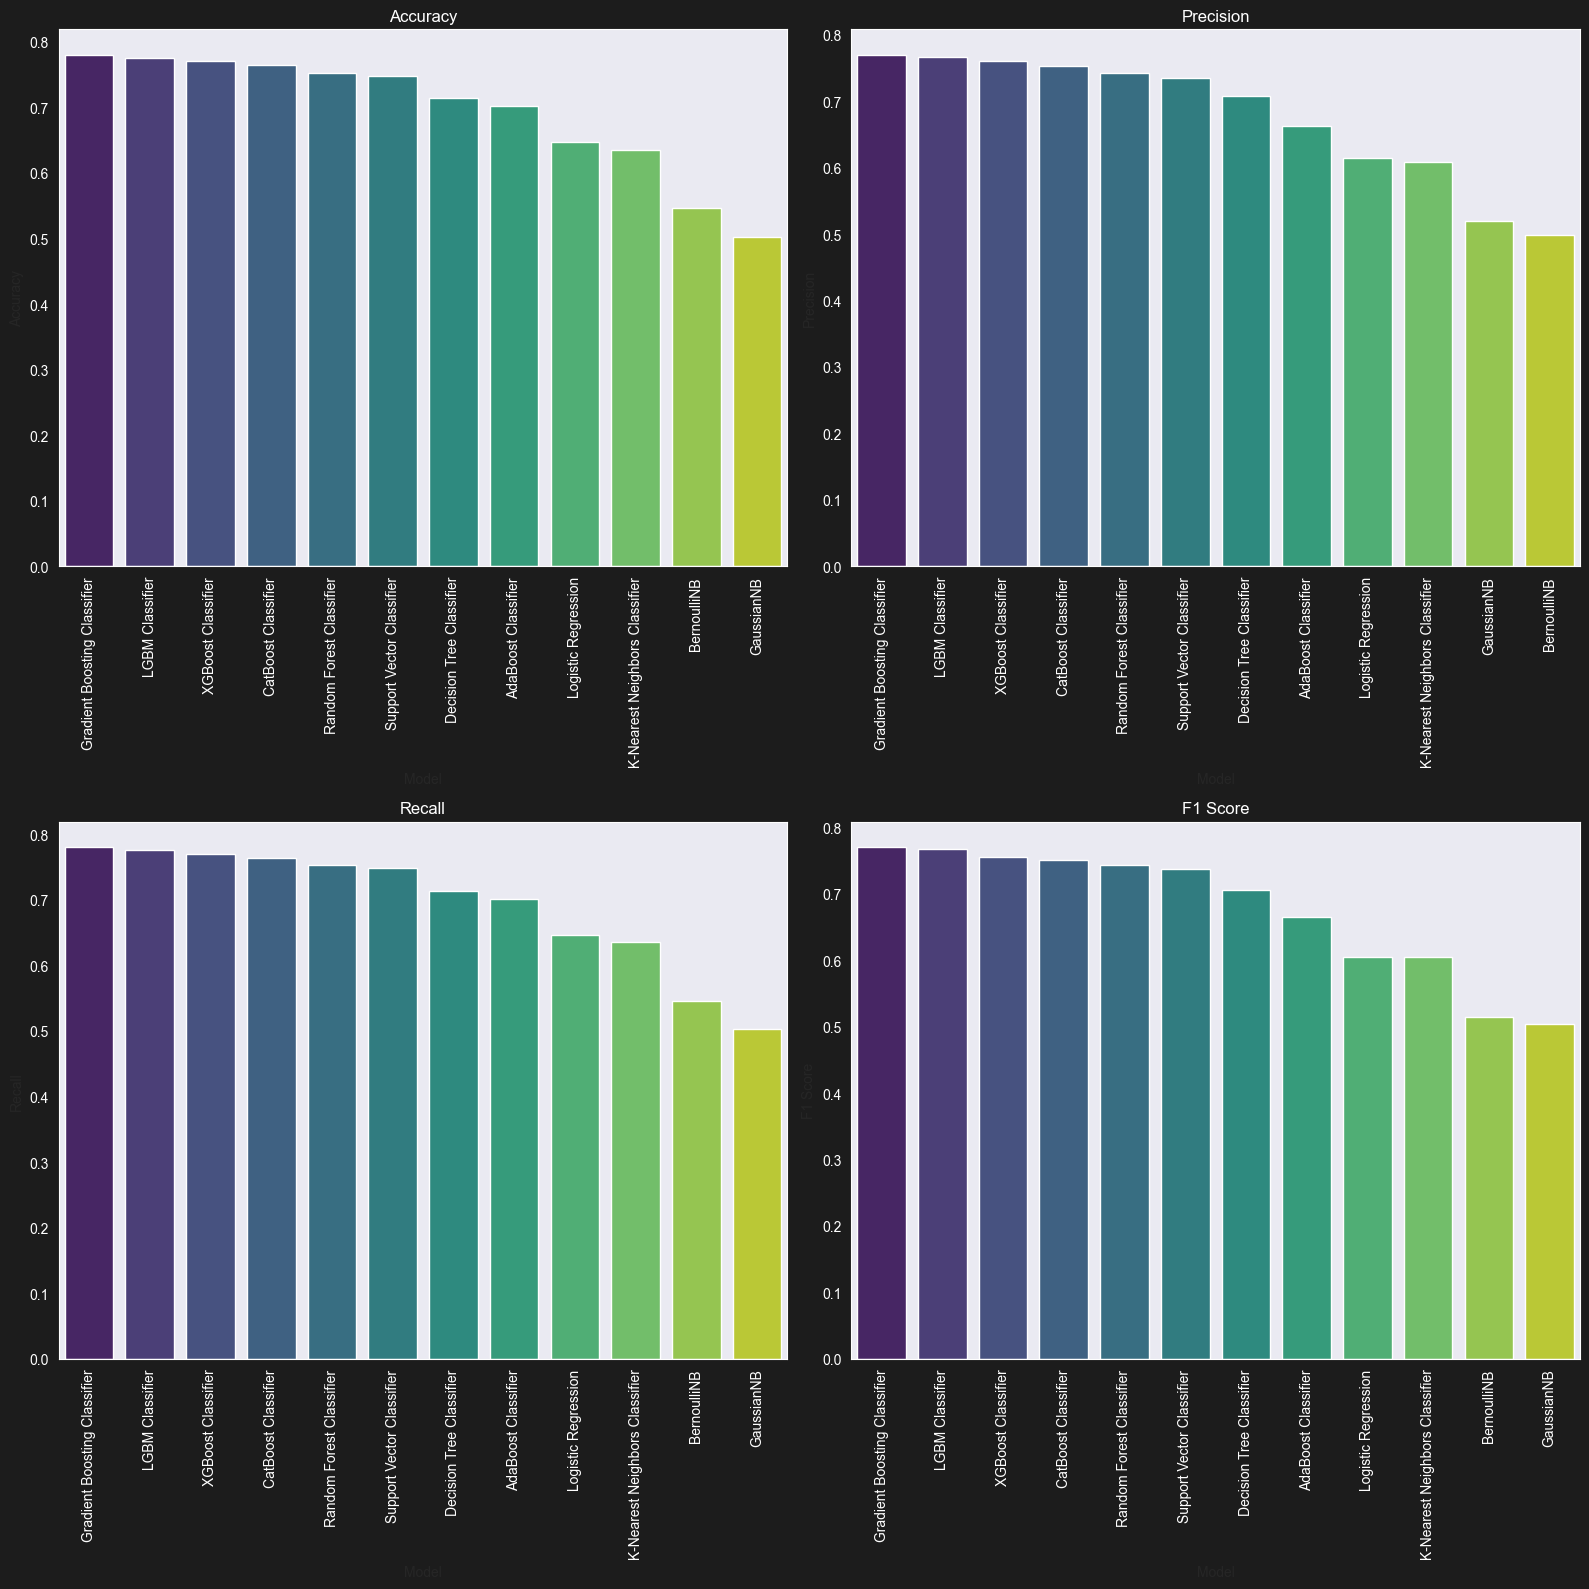

In [29]:
# Let's plot the scores
metrics_cols = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Set the figure size and background color
plt.figure(figsize=(16, 16), facecolor='#1c1c1c')

# Set the Seaborn style to 'dark'
sns.set_style('dark')

for i, col in enumerate(metrics_cols, start=1):
    plt.subplot(2, 2, i)
    sorted_data = metrics.sort_values(by=col, ascending=False)
    sns.barplot(data=sorted_data, x='Model', y=col, palette='viridis')
    plt.xticks(rotation=90, color='white')
    plt.yticks(color='white')
    plt.title(col, color='white')

plt.tight_layout()
plt.show()

# <p style="background-color:#05544b;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:40px 40px;">Selecting the Best Model</p>

In [15]:
# Print the best model's performance metrics
print('-------------------------------------------------')
print("BEST CLASSIFICATION MODEL PERFORMANCE")
print('-------------------------------------------------')
print(f"Model: {best_clf_model['Model']}")
print(f"Accuracy: {best_clf_model['Accuracy']:.2f}")
print(f"Precision: {best_clf_model['Precision']:.2f}")
print(f"Recall: {best_clf_model['Recall']:.2f}")
print(f"F1 Score: {best_clf_model['F1 Score']:.2f}")

-------------------------------------------------
BEST CLASSIFICATION MODEL PERFORMANCE
-------------------------------------------------
Model: Gradient Boosting Classifier
Accuracy: 0.78
Precision: 0.77
Recall: 0.78
F1 Score: 0.77
